- AutoScraper: A Smart, Automatic, Fast and Lightweight Web Scraper for Python

- scrap amazon e-commerce website to find descriptive stats of prices of Samsung phones

In [32]:
from autoscraper import AutoScraper


In [33]:
amazon_url = "https://www.amazon.com/s?k=iphones&ref=nb_sb_noss_2" #url for iphones in amazon
wanted_list =['$542.00','Apple iPhone 11, 64GB, Black - Fully Unlocked (Renewed)']

In [34]:
scarper = AutoScraper()
result = scarper.build(amazon_url,wanted_list)
result

['$141.57',
 '$186.00',
 '$542.00',
 '$354.99',
 '$284.99',
 '$327.00',
 '$738.00',
 '$614.00',
 '$629.00',
 '$364.99',
 '$544.00',
 '$859.99',
 '$358.94',
 '$1,080.00',
 '$1,250.00',
 '$155.00',
 'Apple iPhone 7, 32GB, Silver - For GSM (Renewed)',
 'Apple iPhone 8, 64GB, Space Gray - Fully Unlocked (Renewed)',
 'Apple iPhone 11, 64GB, Black - Fully Unlocked (Renewed)',
 'Apple iPhone XR, 64GB, Black - Fully Unlocked (Renewed)',
 'Apple iPhone 8 Plus, 64GB, Space Gray - Fully Unlocked (Renewed)',
 'Apple iPhone X, 64GB, Space Gray - Fully Unlocked (Renewed)',
 'Apple iPhone 12, 64GB, Blue - Fully Unlocked (Renewed)',
 'Apple iPhone 12 Mini, 64GB, Black - Fully Unlocked (Renewed)',
 'Apple iPhone 11 Pro, 64GB, Midnight Green - Fully Unlocked (Renewed)',
 'Apple iPhone XS, 64GB, Space Gray - Fully Unlocked (Renewed)',
 'Apple iPhone XS Max, 256GB, Space Gray - Fully Unlocked (Renewed Premium)',
 'Apple iPhone 11 Pro Max, 256GB, Midnight Green, Fully Unlocked (Renewed)',
 'Apple iPhone XR

In [35]:
scarper.get_result_similar(amazon_url,grouped=True)#group our result into a dict

{'rule_8r4t': ['$186.00',
  '$534.00',
  '$709.99',
  '$327.00',
  '$859.99',
  '$379.00',
  '$738.00',
  '$639.00',
  '$1,080.00',
  '$1,250.00',
  '$181.14',
  '$449.97',
  '$155.00',
  '$346.72',
  '$544.00',
  '$292.99'],
 'rule_8jky': ['$186.00',
  '$534.00',
  '$709.99',
  '$327.00',
  '$859.99',
  '$379.00',
  '$738.00',
  '$639.00',
  '$1,080.00',
  '$1,250.00',
  '$181.14',
  '$449.97',
  '$155.00',
  '$346.72',
  '$544.00',
  '$292.99'],
 'rule_opr3': [],
 'rule_y0fy': ['Apple iPhone 8, 64GB, Space Gray - Fully Unlocked (Renewed)',
  'Apple iPhone 11, 64GB, Purple - Fully Unlocked (Renewed)',
  'Apple iPhone X, 64GB, Space Gray - Fully Unlocked (Renewed)',
  'Apple iPhone 11 Pro Max, 256GB, Midnight Green, Fully Unlocked (Renewed)',
  'Apple iPhone XS, 64GB, Space Gray - For Verizon (Renewed)',
  'Apple iPhone 8 Plus, 64GB, Gold - Fully Unlocked (Renewed)',
  'Apple iPhone 12, 64GB, Blue - Fully Unlocked (Renewed)',
  'Apple iPhone 11 Pro, 64GB, Gold - Fully Unlocked (Renewed

In [36]:
scarper.set_rule_aliases({'rule_opr3':'Description','rule_y0fy':'Description','rule_8r4t':'Price',
                          'rule_8jky':'Price'})

In [37]:
scarper.keep_rules(['rule_opr3','rule_y0fy','rule_8r4t','rule_8jky'])
scarper.save('amazon_iphones_search')

In [38]:
# get samsung ph description from amazon using similar alias
amazon_samsung = 'https://www.amazon.com/s?k=samsung+phones&crid=2TH3PADH2PXS4&sprefix=samsung+pho%2Caps%2C225&ref=nb_sb_ss_ts-doa-p_1_11'
results_search = scarper.get_result_similar(amazon_samsung,group_by_alias=True)

In [40]:
results_search['Price']

['$265.00',
 '$265.00',
 '$349.99',
 '$349.99',
 '$189.00',
 '$189.00',
 '$349.00',
 '$349.00',
 '$849.99',
 '$849.99',
 '$214.00',
 '$214.00',
 '$399.99',
 '$399.99',
 '$198.47',
 '$198.47',
 '$165.50',
 '$165.50',
 '$498.00',
 '$498.00',
 '$145.47',
 '$145.47',
 '$79.99',
 '$79.99',
 '$184.00',
 '$184.00',
 '$101.38',
 '$101.38',
 '$111.19',
 '$111.19',
 '$338.00',
 '$338.00',
 '$369.99',
 '$369.99',
 '$135.00',
 '$135.00']

In [45]:
import pandas as pd 
results_search_df = pd.DataFrame({'Price_$': results_search['Price']}
                                  )

In [46]:
results_search_df.head()

,Price_$
0,$265.00
1,$265.00
2,$349.99
3,$349.99
4,$189.00


- we can find descriptive stat of samsung phones using the above info

In [53]:
price_split = results_search_df['Price_$'].str.split('$',expand=True)
results_search_df = results_search_df.assign(
                    Price=price_split[1])

results_search_df.drop('Price_$',axis=1,inplace=True)
results_search_df.head()

,Price
0,265.00
1,265.00
2,349.99
3,349.99
4,189.00


In [56]:
results_search_df.Price = results_search_df.Price.astype('float')
results_search_df.Price.describe()

count     36.000000
mean     274.664444
std      183.425221
min       79.990000
25%      145.470000
50%      206.235000
75%      349.990000
max      849.990000
Name: Price, dtype: float64

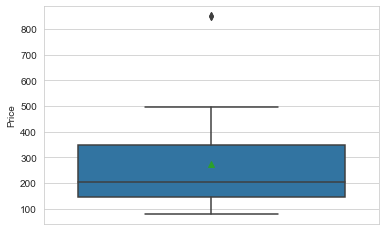

In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(y=results_search_df.Price,showmeans=True)
plt.show()

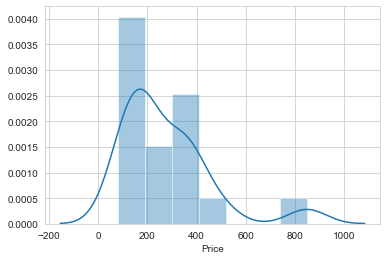

In [59]:
sns.distplot(results_search_df.Price)
plt.show()

- By scraping amazon websit`e we have got descriptive stat of prices of Samsung phones 

- The distribution is right skewed due presence of models in higher price range
- Mean price '$275' and range is from '$79-849'

